<a href="https://colab.research.google.com/github/Giri2005/DA_Intern/blob/main/DA_Intern03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.5k/21.5k [00:00<00:00, 20.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [ ]:
import os
import pandas as pd

os.listdir(path)


['WineQT.csv']

In [ ]:
df = pd.read_csv(os.path.join(path, "WineQT.csv"))
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
import numpy as np

df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df = df.dropna()


In [ ]:
df.corr()["quality"].sort_values(ascending=False)


,quality
quality,1.000000
alcohol,0.484866
sulphates,0.257710
citric acid,0.240821
fixed acidity,0.121970
Id,0.069708
residual sugar,0.022002
pH,-0.052453
free sulfur dioxide,-0.063260
chlorides,-0.124085


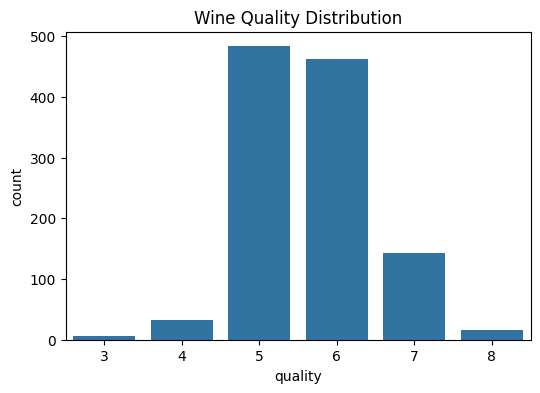

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Distribution")
plt.show()


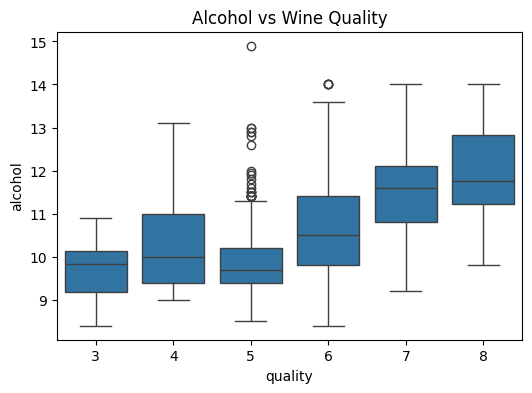

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Alcohol vs Wine Quality")
plt.show()


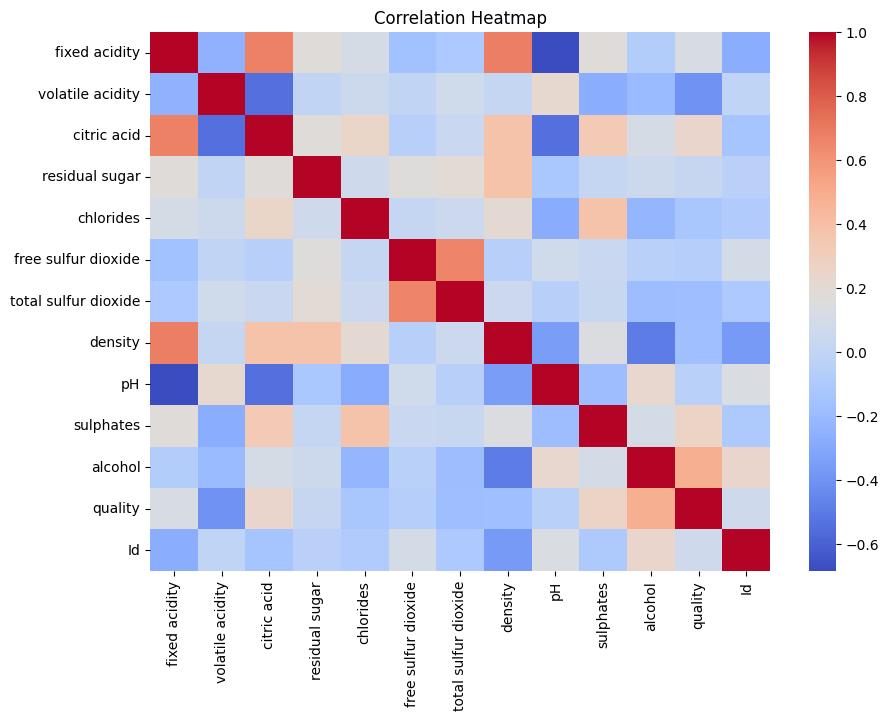

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop(["quality", "Id"], axis=1)
y = df["quality"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc


0.6986899563318777

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, sgd_pred)
sgd_acc


0.5021834061135371

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc


0.6375545851528385

In [ ]:
model_results = pd.DataFrame({
    "Model": ["Random Forest", "SGD Classifier", "SVC"],
    "Accuracy": [rf_acc, sgd_acc, svc_acc]
})

model_results


,Model,Accuracy
0,Random Forest,0.698690
1,SGD Classifier,0.502183
2,SVC,0.637555


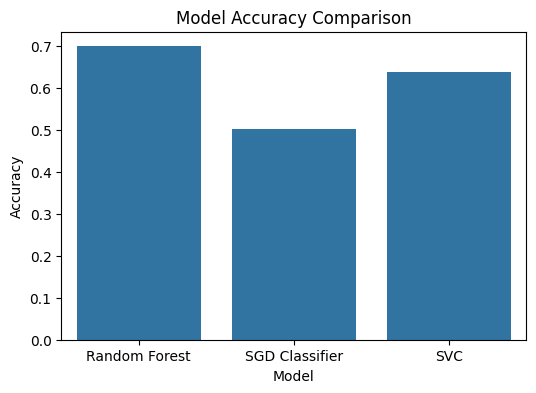

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=model_results)
plt.title("Model Accuracy Comparison")
plt.show()


In this project, wine quality was predicted using chemical properties through three machine learning classifiers. Random Forest achieved the best performance due to its ability to capture non-linear relationships. The study demonstrates how machine learning can support automated quality assessment in viticulture.